<a href="https://colab.research.google.com/github/GhosthoundMX30/Codigos-SNEDP/blob/main/EcElipticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ecuaciones elípticas

Consideramos la ecuación diferencial parcial (EDP) elíptica

$$
\dfrac{\partial^{2} u}{\partial x^{2}}(x,y) + \dfrac{\partial^{2} u}{\partial y^{2}}(x,y) = f(x,y).\tag{1.1}
$$

Consideramos el dominio,

$$
\mathcal{R} = \left\{(x,y)\,\left|\,a <x < b,\,c<y<d\right\}\right.
$$

y sea $\mathcal{S}$ la frontera de $\mathcal{R}$. Tomando una partición 

$$
h = \dfrac{(b-a)}{n}\quad k = \dfrac{(d-c)}{m}
$$

para las abscisas y ordenadas, consideramos la colección de puntos,

$$
\mathcal{M} = \left\{(x_{i},y_{j})\in \mathcal{R}\,\left|\,\begin{array}{cl}
x_{i} = a + ih, & i=1,\ldots,n\\
y_{j} = c + jk, & j=1,\ldots,m \end{array}\right\}\right.
$$

Utilizando diferencias centrales, tenemos que las aproximaciones de las segundas derivadas parciales para los puntos en $\mathcal{M}$ están dadas por

$$
\dfrac{\partial^{2} u}{\partial x^{2}}(x_{i},y_{j}) \approx \dfrac{u(x_{i+1},y_{j}) - 2u(x_{i},y_{j}) + u(x_{i-1},y_{j})}{h^2},\\
\dfrac{\partial^{2} u}{\partial y^{2}}(x_{i},y_{j}) \approx \dfrac{u(x_{i},y_{j+1}) - 2u(x_{i},y_{j}) + u(x_{i},y_{j-1})}{k^2}.
$$

Tomando la notación $\omega_{i,j} = u(x_{i},y_{j})$ y sustituyendo las ecuaciones anteriores en la ecuación (1.1), se tiene la discretización

$$
\dfrac{\omega_{i+1,j} - 2\omega_{i,j} + \omega_{i-1,j}}{h^{2}} + \dfrac{\omega_{i,j+1} - 2\omega_{i,j} + \omega_{i,j-1}}{k^{2}} = f_{i,j},
$$

para $1\leq i \leq n-1$, $1\leq j \leq m-1$. Multiplicando por $-h^{2}$ la última ecuación y agrupando los términos semejantes, tenemos el siguiente conjunto de ecuaciones,

$$
2\left[\left(\dfrac{h}{k}\right)^{2} + 1\right]\omega_{i,j} - (\omega_{i+1,j} + \omega_{i-1,j})  - \left(\dfrac{h}{k}\right)^{2}(\omega_{i,j+1} + \omega_{i,j-1}) = -h^2f_{i,j},
$$

para $1\leq i \leq n-1$, $1\leq j \leq m-1$. Dadas las condiciones de frontera, esto nos da $(n-1)(m-1)$ incógnitas ya que

$$
\begin{align*}
	\omega_{0,j} &= g(x_{0},y_{j}) &
	\omega_{n,j} &= g(x_{n},y_{j})\quad j=0,\ldots,m,\\
	\omega_{i,0} &= g(x_{i},y_{0})&
	\omega_{i,m} &= g(x_{i},y_{m})\quad i=1,\ldots,n-1.\\
\end{align*}
$$

Ordenando las incógnitas por renglones, el vector de incógnitas se puede particionar como

$$
w = \begin{pmatrix}
	\omega^{[1]} \\\omega^{[2]} \\\vdots\\\omega^{[m-1]}
\end{pmatrix}\quad\text{donde}\quad
\omega^{[j]} = \begin{pmatrix}
	\omega_{1,j} \\\omega_{2,j} \\\vdots\\\omega_{n-1,j}
\end{pmatrix},
$$

Para obtener las soluciones es necesario resolver un sistema de la forma

$$
Aw = b.
$$

Considerando la forma de $w$ y tomando $\alpha = \left(\dfrac{h}{k}\right)^{2}$, esto da una matriz $A$ de la forma:

$$
A = \begin{pmatrix}
	T & -\alpha I & \\
	-\alpha I & T & -\alpha I & \\
	& -\alpha I & T & -\alpha I &\\
	& & \ddots & \ddots & \ddots \\
	& & & -\alpha I & T 
\end{pmatrix}
$$

la cual es tridiagonal por bloques de tamaño $(m-1)\times(m-1)$ donde cada bloque $I$ (la matriz identidad) o $T$ dada por:

$$
T = \begin{pmatrix}
	2(\alpha + 1) & -1 & \\
	-1 & 2(\alpha + 1) & -1 & \\
	& -1 & 2(\alpha + 1) & -1 &\\
	& & \ddots & \ddots & \ddots \\
	& & & -1 & 2(\alpha + 1)
\end{pmatrix}
$$

son de tamaño $(n-1)\times(n-1)$. El lado derecho es de la forma

$$
b = \begin{pmatrix}
	b^{[1]} \\b^{[2]} \\\vdots\\b^{[m-1]}
\end{pmatrix}
$$

donde,

$$
b^{[1]} = \begin{pmatrix}
	\omega_{0,1} + \alpha \omega_{1,0} -h^2f_{1,1}\\\alpha \omega_{2,0} -h^2f_{2,1}\\\vdots\\\alpha \omega_{n-2,0}-h^2f_{n-2,1}\\\omega_{n,1} + \alpha\omega_{n-1,0}-h^2f_{n-1,1}
\end{pmatrix},\quad b^{[m-1]} = \begin{pmatrix}
	\omega_{0,m-1} + \alpha \omega_{1,m} -h^2f_{1,m-1}\\\alpha \omega_{2,m}-h^2f_{2,m-1} \\\vdots\\\alpha \omega_{n-2,m}-h^2f_{n-2,m-1}\\w_{n,m-1} + \alpha\omega_{n-1,m}-h^2f_{n-1,m-1}
\end{pmatrix}
$$

y

$$
b^{[j]} = \begin{pmatrix}
	\omega_{0,j}-h^2f_{1,j} \\-h^2f_{2,j} \\\vdots\\-h^2f_{n-2,j}\\w_{n,j}-h^2f_{n-1,j}
\end{pmatrix},\quad j=2,\ldots,m-2.
$$

In [ ]:
# Modulos
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# Funciones auxiliares
def f_conv(f_str,var = 'x',tipo = 'numpy'):
    '''Regresa una función lambda que representa una función matemática f(x).
    
    * Entrada
        * f_str (str): Cadena con la expresión de una función.
        * var (str): Varible independiente.
        * tipo (str): Compatibilidad. Ver documentación de lambdify en sympy.        
    * Salida
        * (function): Función de python.        
    * Dependencias
        * sympy (module).
    '''
    return sp.lambdify(sp.symbols(var),sp.sympify(f_str),tipo)

def malla(a,b,c,d,n,m = None):
    '''Crea una malla euclideana en el dominio [a,b]x[c,d] subconjunto de R^2.
    
    * Entrada
        * a,b,c,d (float): Límites para los intervalos.
        * n (int): Número de puntos equiespaciados en el intervalo [a,b].
        * m (int): Número de puntos equiespaciados en el intervalo [c,d]. Si no
                   se da se toma igual que n.
    * Salida
        * (dictionary): Contiene las coordenadas en dos matrices (salida de la 
                        función meshgrid) con las claves "x" y "y". También 
                        contiene los espaciamientos con las claves "h" 
                        (espaciamiento en el intervalo [a,b]) y "k" 
                        (espaciamiento en el intervalo [c,d]).
    * Dependencias
        * numpy (module).
    '''
    if m == None:
        m = n
    h,k = (b-a)/(n-1),(d-c)/(m-1) # Espaciamientos en x y y.
    x = np.linspace(a,b,n) 
    y = np.linspace(c,d,m)
    M = np.meshgrid(x,y) # Malla
    return {'x':M[0],'y':M[1],'h':h,'k':k}

def solEDP_Poisson(M,CF,f = np.vectorize(lambda x,y:0.0)):
    '''Dada una malla (M) y condiciones de frontera (CF) esta función crea y
    resuleve el sistema obtenido de la discretización de una EDP de Laplace en 
    dos dimensiones mediante diferencias finitas.
    * Entrada
        * M (dictionary): Malla (vease la función malla).
        * CF (dictionary): Contiene las condiciones de frontera bajo las claves
                           "izq" (izquierda), "der" (derecha), "abj" (abajo) y 
                           "arrb" (arriba). Cada un de estas claves da acceso a
                           un diccionario con la función y a la variable 
                           independiente dadas como cadena para usarse con 
                           f_conv. Sus claves son "fun" y "var", respectivamente.
        * f (function): Funcion del lado derecho. Si no se da f = 0 (Laplace).
    * Salida
        * u_aprx (2d ndarray)): Solución aproximada sobre los puntos de la malla.
    * Dependencias
        * numpy (module), f_conv (function).
    '''    
    u_aprx = np.zeros(M['x'].shape,float)
    # Aplicamos las condiciones de frontera
    u_aprx[:,0] = f_conv(CF['izq']['fun'],CF['izq']['var'])(M['y'][:,0])
    u_aprx[:,-1] = f_conv(CF['der']['fun'],CF['der']['var'])(M['y'][:,-1])
    u_aprx[0,:] = f_conv(CF['abj']['fun'],CF['abj']['var'])(M['x'][0,:])
    u_aprx[-1,:] = f_conv(CF['arrb']['fun'],CF['arrb']['var'])(M['x'][-1,:])
    
    #Creamos el espacio para la matriz A y el lado derecho b
    m,n = u_aprx.shape
    m,n = m-2,n-2
    h,k = M['h'],M['k']
    A = np.zeros((n*m,n*m),float)
    b = np.zeros((n*m,),float)
    
    # Creamos las matrices para construir el sistema tridiagonal por bloques
    alfa = (h/k)**2
    I = np.ones((n,1)) 
    T = 2.*(alfa+1)*np.diagflat(I) - np.diagflat(I[1:],1) - np.diagflat(I[1:],-1)
    
    # Construimos el sistema
    b[0:n] = alfa*u_aprx[0,1:-1] #b^[1]
    b[n*(m-1):] = alfa*u_aprx[-1,1:-1] #b^[m-1]
    for j in range(m):
        A[n*j:n*(j+1),n*j:n*(j+1)] = T #Diagonal
        b[n*j],b[n*(j+1)-1] = b[n*j] + u_aprx[j+1,0],b[n*(j+1)-1] \
            + u_aprx[j+1,-1]  #b^[j]        
        b[n*j:n*(j+1)] -=  h**2*f(M['x'][j+1,1:-1,],M['y'][j+1,1:-1]) #b^[j]
        if j > 0: #Bajo la diagonal
            A[n*j:n*(j+1),n*(j-1):n*j] = alfa*np.diagflat(-1.*I)            
        if j < m-1: #Sobre la diagonal
            A[n*j:n*(j+1),n*(j+1):n*(j+2)] = alfa*np.diagflat(-1.*I)
    
    # Calculamos la solucion en los nodos interiores
    u_aprx[1:m+1,1:n+1] = np.linalg.solve(A,b).reshape(m,n)
    return u_aprx

#### Ecuación de Laplace

Consideramos la ecuación diferencial parcial

$$
\dfrac{\partial^{2} u}{\partial x^{2}}(x,y) + \dfrac{\partial^{2} u}{\partial y^{2}}(x,y) = 0.\quad1<x<2,\quad0<y<1,\tag{2.1}
$$

con las condiciones de frontera

$$
\begin{align*}
	u(x,0) &= 2\ln(x), & u(x,1) = \ln(x^{2}+ 1), & &1\leq x\leq 2;\\
	u(1,y) &= \ln(y^{2} + 1), & u(2,y) = \ln(y^{2} + 4), & &0\leq y\leq 1.
\end{align*}
$$

La solución $u(x,y) = \ln(x^{2} + y^{2})$ satisface la EDP (2.1)

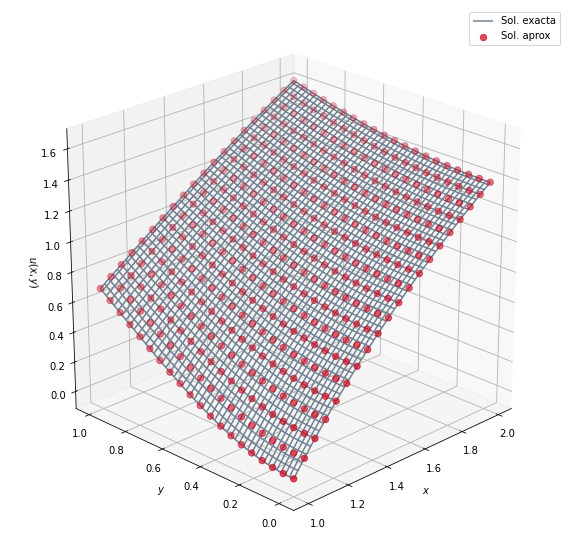

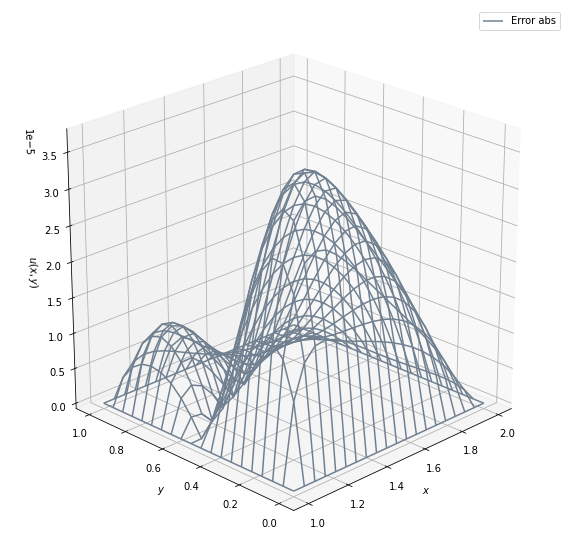

In [ ]:
#Datos
a,b = 1.,2. #Intervalo x
c,d = 0.,1. #Intervalo y
n,m = 20,20 #Numero de nodos x, y
M = malla(a, b, c, d, n, m) #Malla aproximacion
factor = 5 #Factor para refinar la malla
M_exct = malla(a, b, c, d, factor*(n-1) + 1, factor*(m-1) + 1) #Malla sol. exacta
CF = {'izq':{'fun':'log(y**2 + 1)','var':'y'},
      'der':{'fun':'log(y**2 + 4)','var':'y'},
      'abj':{'fun':'2*log(x)','var':'x'},
      'arrb':{'fun':'log(x**2 + 1)','var':'x'}} #Condiciones de frontera
Sol_exct = 'log(x**2 + y**2)' #Sol. exacta

# Calculo de soluciones
u_exact = f_conv(Sol_exct,'x y')(M_exct['x'],M_exct['y']) #Sol. exacta
u_aprx = solEDP_Poisson(M,CF) #Sol. aproximada

# Gráfica de comparacion
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111,projection = '3d')
ax.plot_wireframe(M_exct['x'],M_exct['y'],u_exact,color = 'slategrey',label = 'Sol. exacta')
ax.scatter3D(M['x'],M['y'],u_aprx,color = (0.8,0,0.1,0.7),s=40,label = 'Sol. aprox')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$u(x,y)$')
ax.view_init(24,-135)
ax.legend()
plt.show()

# Gráfica del error
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111,projection = '3d')
u_exact = f_conv(Sol_exct,'x y')(M['x'],M['y'])
ax.plot_wireframe(M['x'],M['y'],np.fabs(u_exact - u_aprx),
                  color = 'slategrey',label = 'Error abs')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$u(x,y)$')
ax.view_init(24,-135)
ax.legend()
plt.show()

#### Ecuación de Poisson

Consideramos la ecuación diferencial parcial

$$
\dfrac{\partial^{2} u}{\partial x^{2}}(x,y) + \dfrac{\partial^{2} u}{\partial y^{2}}(x,y) = (x^2 + y^2)e^{xy}.\quad 0<x<2,\quad0<y<1,\tag{3.1}
$$

con las condiciones de frontera

$$
\begin{align*}
	u(0,y) &= 1, & u(2,y) = e^{2y}, & &0\leq y\leq 1;\\
	u(x,0) &= 1, & u(x,1) = e^x, & &0\leq x\leq 2.
\end{align*}
$$

La solución $u(x,y) = e^{xy}$ satisface la EDP (3.1)

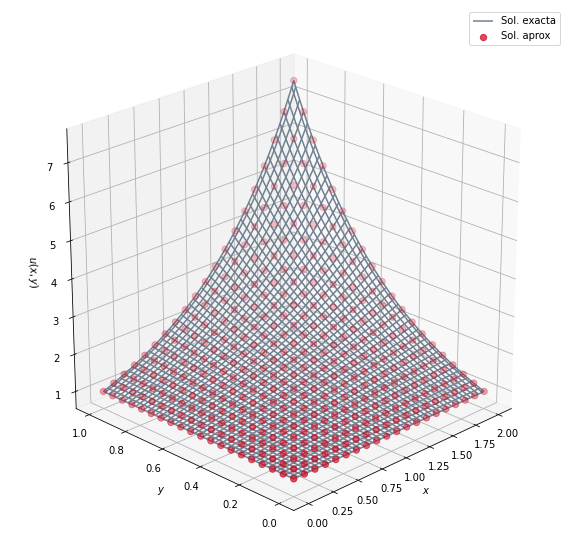

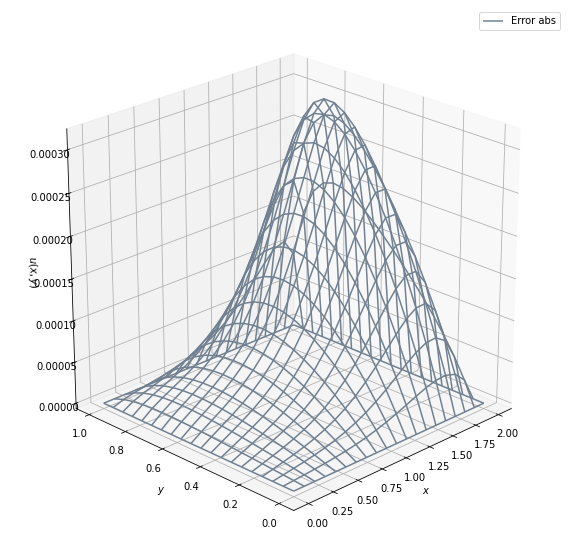

In [ ]:
#Datos
a,b = 0.,2. #Intervalo x
c,d = 0.,1. #Intervalo y
n,m = 20,20 #Numero de nodos x, y
M = malla(a, b, c, d, n, m) #Malla aproximacion
factor = 5 #Factor para refinar la malla
M_exct = malla(a, b, c, d, factor*(n-1) + 1, factor*(m-1) + 1) #Malla sol. exacta
CF = {'izq':{'fun':'1','var':'y'},
      'der':{'fun':'exp(2*y)','var':'y'},
      'abj':{'fun':'1','var':'x'},
      'arrb':{'fun':'exp(x)','var':'x'}} #Condiciones de frontera
f = '(x**2 + y**2)*exp(x*y)' #Lado derecho
Sol_exct = 'exp(x*y)' #Sol. exacta

# Calculo de soluciones
u_exact = f_conv(Sol_exct,'x y')(M_exct['x'],M_exct['y']) #Sol. exacta
u_aprx = solEDP_Poisson(M,CF, f_conv(f,'x y')) #Sol. aproximada

# Gráfica de comparacion
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111,projection = '3d')
ax.plot_wireframe(M_exct['x'],M_exct['y'],u_exact,color = 'slategrey',label = 'Sol. exacta')
ax.scatter3D(M['x'],M['y'],u_aprx,color = (0.8,0,0.1,0.7),s=40,label = 'Sol. aprox')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$u(x,y)$')
ax.view_init(24,-135)
ax.legend()
plt.show()

# Gráfica del error
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111,projection = '3d')
u_exact = f_conv(Sol_exct,'x y')(M['x'],M['y'])
ax.plot_wireframe(M['x'],M['y'],np.fabs(u_exact - u_aprx),
                  color = 'slategrey',label = 'Error abs')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$u(x,y)$')
ax.view_init(24,-135)
ax.legend()
plt.show()